# ONTARIO SCHOOLS WITH COVID-19 CASES ANALYSIS
## Peter Stangolis

#### [Data URL:](https://data.ontario.ca/dataset/b1fef838-8784-4338-8ef9-ae7cfd405b41/resource/7fbdbb48-d074-45d9-93cb-f7de58950418/download/schoolcovidsummary.csv) 

## Graphical Data Exploration

### Import the required libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure

from pylab import rcParams
#rcParams['figure.figsize'] = 18, 6

import datetime
import seaborn as sns

In [5]:
# Graph Style Settings:

rcParams['figure.figsize'] = 18, 6

plt.style.use('ggplot')

%matplotlib inline

### Import the cleaned data set 

In [6]:
df = pd.read_csv("ont_school_covid19_101.csv")

df.tail()

,reported_date,current_schools_w_cases,current_schools_closed,current_total_number_schools,new_total_school_related_cases,new_school_related_student_cases,new_school_related_staff_cases,new_school_related_unspecified_cases,recent_total_school_related_cases,cumulative_school_related_cases,cumulative_school_related_student_cases,cumulative_school_related_staff_cases,cumulative_school_related_unspecified_cases
45,2020-11-16,683,1,4828,106,63,14,29.0,1143.0,3387,1913,423,1051.0
46,2020-11-17,670,1,4828,133,73,23,37.0,1126.0,3518,1985,445,1088.0
47,2020-11-18,670,3,4828,109,92,17,0.0,1121.0,3626,2077,461,1088.0
48,2020-11-19,680,3,4828,91,75,16,0.0,1143.0,3710,2147,476,1087.0
49,2020-11-20,681,3,4828,87,60,27,0.0,1150.0,3803,2209,507,1087.0


## Initial Line Plot of Cumulative Cases from Sept - Nov 2020

TypeError: suptitle() takes 1 positional argument but 3 were given

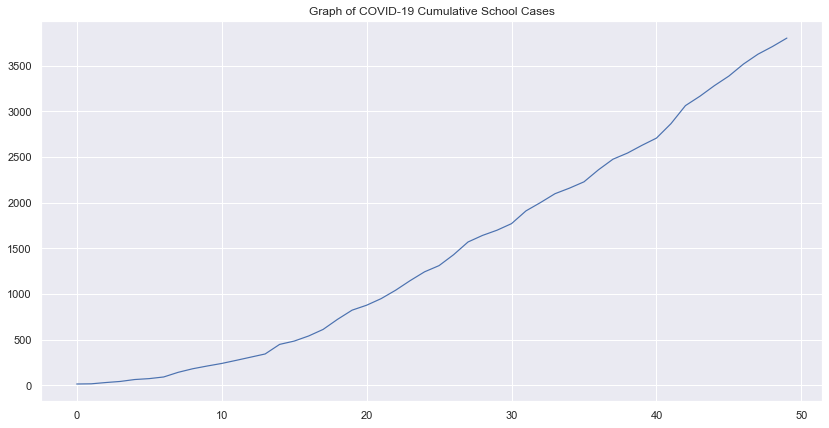

In [11]:
sns.set(rc={'figure.figsize':(14, 7)})

df['cumulative_school_related_cases'].plot(linewidth=1.2)
plt.title("Graph of COVID-19 Cumulative School Cases")
plt.suptitle(min(df['reported_date']), " - ", max(df['reported_date']))